Spline tuyến tính

Đoạn từ (1, 1) đến (3, 2): y = 0.5x + 0.5
Đoạn từ (3, 2) đến (4, 3): y = 1.0x + -1.0
Đoạn từ (4, 3) đến (5, 4): y = 1.0x + -1.0


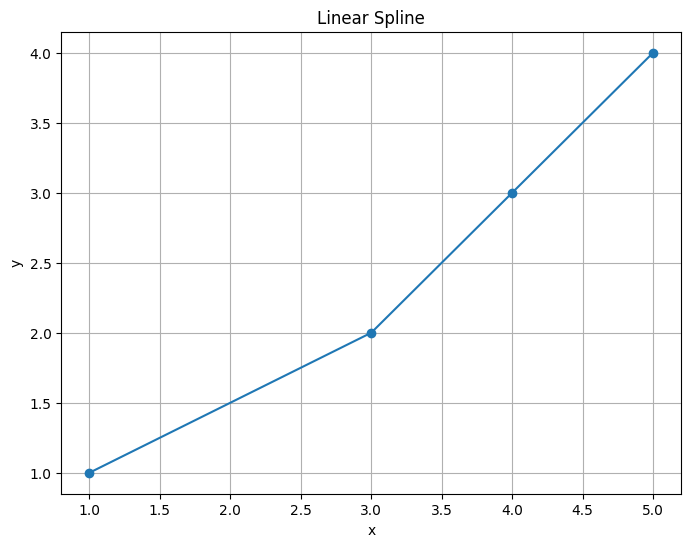

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
x_data = np.array([3, 1, 4, 5])
y_data = np.array([2, 1, 3, 4])

# Sắp xếp dữ liệu theo x
indices = np.argsort(x_data)
x_sorted = x_data[indices]
y_sorted = y_data[indices]

# Tính toán và hiển thị các hàm a*x + b
for i in range(len(x_sorted) - 1):
    x1, x2 = x_sorted[i], x_sorted[i + 1]
    y1, y2 = y_sorted[i], y_sorted[i + 1]
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1
    print(f"Đoạn từ ({x1}, {y1}) đến ({x2}, {y2}): y = {a}x + {b}")

# Vẽ đoạn thẳng nối các điểm
plt.figure(figsize=(8, 6))
plt.plot(x_sorted, y_sorted, '-o')  # '-o' tạo đoạn thẳng nối các điểm và hiển thị các điểm đó
plt.title('Linear Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Spline cấp 2

-0.5


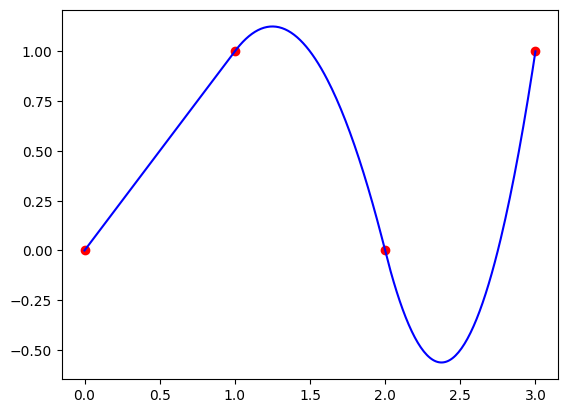

In [20]:
import numpy as np

def quadratic_spline(x, y, xx, ioption, derivative_at_left=None):
    n = len(x)  # No. of data points arranged in ascending order.

    if xx < x[0] or xx > x[-1]:
        raise ValueError('out of x range!')

    # Initialize d array
    d = np.zeros(n)

    # Calculate d[0]
    if ioption == 1:
        d[0] = 0.0  # Natural quadratic spline condition
    else:
        d[0] = derivative_at_left  # Use the given derivative at the left endpoint

    # Use the recursive algorithm to calculate all d[i]
    for i in range(1, n):
        d[i] = 2.0 * (y[i] - y[i-1]) / (x[i] - x[i-1]) - d[i-1]

    # Find the interval where xx resides
    m = 0
    for i in range(n-1):
        if xx >= x[i] and xx <= x[i+1]:
            m = i
            break

    # Calculate y(xx) using quadratic spline equation
    f = (xx - x[m]) * (0.5 * (d[m+1] - d[m]) * (xx - x[m]) / (x[m+1] - x[m]) + d[m]) + y[m]
    return f

# Example usage:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])
xx = 2.5
ioption = 2  # Use 2 to provide the derivative at the left endpoint
derivative_at_left = 1.0  # Example derivative at the left endpoint
result = quadratic_spline(x, y, xx, ioption, derivative_at_left)
print(result)
#vẽ 
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
# Plot the quadratic spline
xnew = np.linspace(x[0], x[-1], 300)
ynew = [quadratic_spline(x, y, xx, ioption, derivative_at_left) for xx in xnew]
plt.plot(xnew, ynew, 'b-')
plt.show()

Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Spline interpolation at xx = 2.5: -0.5
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.  4.]]
Coefficients [a, b, c] for each interval:
[[ 0.  1.  0.]
 [ 1.  1. -2.]
 [ 0. -3.

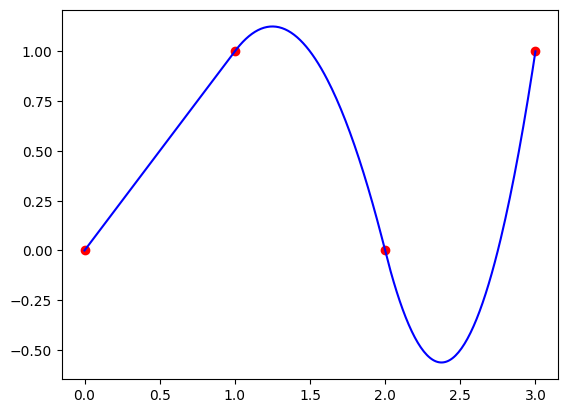

In [21]:
import numpy as np

def quadratic_spline(x, y, xx, ioption, derivative_at_left=None):
    n = len(x)  # No. of data points arranged in ascending order.

    if xx < x[0] or xx > x[-1]:
        raise ValueError('out of x range!')

    # Initialize d array
    d = np.zeros(n)

    # Calculate d[0]
    if ioption == 1:
        d[0] = 0.0  # Natural quadratic spline condition
    else:
        d[0] = derivative_at_left  # Use the given derivative at the left endpoint

    # Use the recursive algorithm to calculate all d[i]
    for i in range(1, n):
        d[i] = 2.0 * (y[i] - y[i-1]) / (x[i] - x[i-1]) - d[i-1]

    coefficients = np.zeros((n-1, 3))  # Store coefficients a, b, c

    for i in range(n-1):
        a_i = y[i]
        b_i = d[i]
        c_i = (d[i+1] - d[i]) / (2 * (x[i+1] - x[i]))
        coefficients[i] = [a_i, b_i, c_i]

    # Find the interval where xx resides
    m = 0
    for i in range(n-1):
        if xx >= x[i] and xx <= x[i+1]:
            m = i
            break

    # Calculate y(xx) using quadratic spline equation
    f = (xx - x[m]) * (0.5 * (d[m+1] - d[m]) * (xx - x[m]) / (x[m+1] - x[m]) + d[m]) + y[m]

    # Print the coefficients
    print("Coefficients [a, b, c] for each interval:")
    print(coefficients)

    return f, coefficients

# Example usage:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])
xx = 2.5
ioption = 2  # Use 2 to provide the derivative at the left endpoint
derivative_at_left = 1.0  # Example derivative at the left endpoint
result, coeffs = quadratic_spline(x, y, xx, ioption, derivative_at_left)
print("Spline interpolation at xx = {}: {}".format(xx, result))
#vẽ
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
# Plot the quadratic spline
xnew = np.linspace(x[0], x[-1], 300)
ynew = [quadratic_spline(x, y, xx, ioption, derivative_at_left)[0] for xx in xnew]
plt.plot(xnew, ynew, 'b-')
plt.show()


-0.5


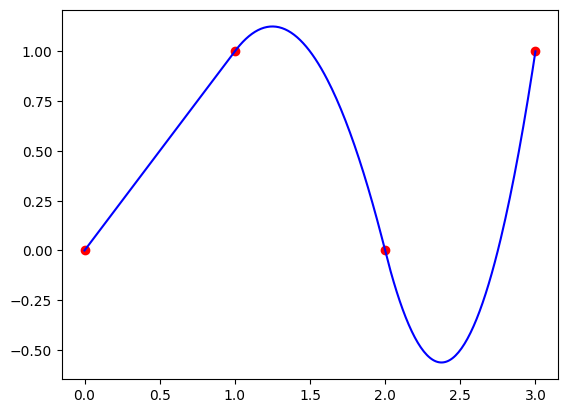

In [19]:
import numpy as np

def quadratic_spline(x, y, xx, ioption, d2=None):
    n = len(x)  # No. of data points arranged in ascending order

    if xx < x[0] or xx > x[-1]:
        raise ValueError('out of x range!')  # Error message if given point, xx, is out of range

    # declare array for d=ds/dx
    d = np.zeros(n)

    # Calculate d(1)
    if ioption == 1:
        d[0] = 0.0  # Natural quadratic spline condition
    else:
        if d2 is None:
            raise ValueError('d2 must be provided when ioption is not 1')
        d[0] = d2  # Use provided derivative at the right endpoint

    # Use the recursive algorithm to calculate all d(i)
    for i in range(1, n):
        d[i] = 2.0 * (y[i] - y[i-1]) / (x[i] - x[i-1]) - d[i-1]

    # To find in which data interval xx resides
    for i in range(n - 1):
        if xx >= x[i] and xx <= x[i + 1]:
            m = i
            break

    # Calculate y(xx) due to quadratic spline
    f = (xx - x[m]) * (0.5 * (d[m + 1] - d[m]) * (xx - x[m]) / (x[m + 1] - x[m]) + d[m]) + y[m]
    return f

# Example usage
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])
xx = 2.5
ioption = 2
d2 = 1.0  # Example value for the derivative at the right endpoint

result = quadratic_spline(x, y, xx, ioption, d2)
print(result)
#vẽ
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
# Plot the quadratic spline
xnew = np.linspace(x[0], x[-1], 300)
ynew = [quadratic_spline(x, y, xx, ioption, d2) for xx in xnew]
plt.plot(xnew, ynew, 'b-')
plt.show()


Spline cấp 3

a: [0 1 0]
b: [ 1.         -0.33333333  0.33333333]
c: [ 1.33333333 -2.66666667  3.33333333]
d: [-1.33333333  2.         -2.66666667]


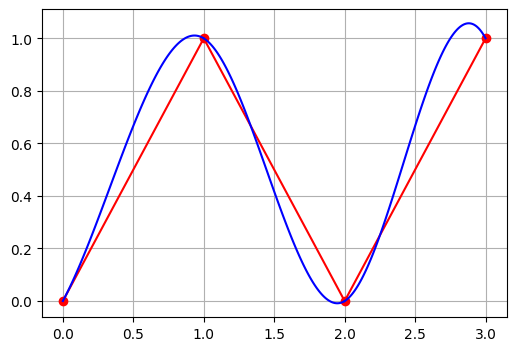

In [13]:
import numpy as np

def natural_cubic_spline_with_derivatives(x, y, f_prime_a, f_prime_b):
    n = len(x) - 1
    h = np.diff(x)
    
    # Step 1: Calculate alpha
    alpha = np.zeros(n+1)
    alpha[0] = 3 * ( (y[1] - y[0]) / h[0] - f_prime_a )
    alpha[n] = 3 * ( f_prime_b - (y[n] - y[n-1]) / h[n-1] )
    
    for i in range(1, n):
        alpha[i] = 3 * ( (y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1] )
    
    # Step 2: Set up the system
    l = np.zeros(n+1)
    mu = np.zeros(n+1)
    z = np.zeros(n+1)
    
    l[0] = 2 * h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]
    
    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    l[n] = h[n-1] * (2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1] * z[n-1]) / l[n]
    
    # Step 3: Solve for c, b, and d
    a = y.copy()
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    
    c[n] = z[n]
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    return a[:-1], b, c[:n], d  # Return coefficients of spline segments

# Ví dụ sử dụng
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])
f_prime_a = 1
f_prime_b = -1

a, b, c, d = natural_cubic_spline_with_derivatives(x, y, f_prime_a, f_prime_b)
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)
# vẽ 
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'ro-')
for i in range(len(x) - 1):
    xx = np.linspace(x[i], x[i+1], 100)
    yy = a[i] + b[i] * (xx - x[i]) + c[i] * (xx - x[i])**2 + d[i] * (xx - x[i])**3
    plt.plot(xx, yy, 'b')
plt.grid(True)
plt.show()


Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:
Đoạn 1: [-1.33333333  1.33333333  1.          0.        ]
Đoạn 2: [ 2.         -2.66666667 -0.33333333  1.        ]
Đoạn 3: [-2.66666667  3.33333333  0.33333333  0.        ]


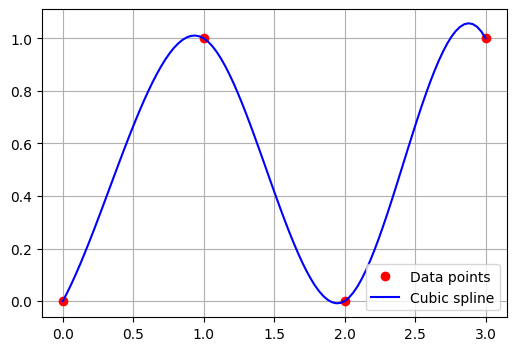

In [5]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu điểm
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])

# Giá trị đạo hàm tại hai đầu mút
f_prime_a = 1  # Đạo hàm tại x[0]
f_prime_b = -1  # Đạo hàm tại x[-1]

# Tạo spline cubic với đạo hàm tại hai đầu mút
cs = CubicSpline(x, y, bc_type=((1, f_prime_a), (1, f_prime_b)))

# Lấy hệ số của các đa thức spline
coefficients = cs.c

# In ra hệ số
print("Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:")
for i, coef in enumerate(coefficients.T, 1):
    print(f"Đoạn {i}: {coef}")
    
# Vẽ đồ thị
xx = np.linspace(x[0], x[-1], 100)
yy = cs(xx)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'b', label='Cubic spline')
plt.grid(True)
plt.legend()
plt.show()

Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:
Đoạn 1: (0, 1.6666666666666665, 0.0, -0.6666666666666666)
Đoạn 2: (1, -0.33333333333333337, -2.0, 1.3333333333333333)
Đoạn 3: (0, -0.33333333333333326, 2.0, -0.6666666666666666)


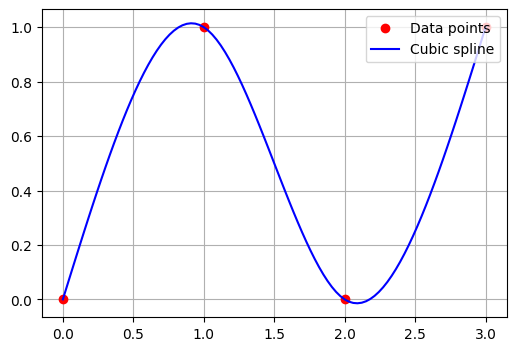

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu điểm
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])

# Giá trị đạo hàm bậc hai tại hai đầu mút
f_double_prime_a = 0  # Đạo hàm bậc hai tại x[0]
f_double_prime_b = 0  # Đạo hàm bậc hai tại x[-1]

# Số lượng đoạn
n = len(x) - 1

# Hệ số khoảng cách
h = np.diff(x)

# Ma trận hệ số
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

# Đặt giá trị biên
A[0, 0] = 1
A[n, n] = 1
b[0] = f_double_prime_a
b[n] = f_double_prime_b

# Điền giá trị cho ma trận và vectơ hệ số
for i in range(1, n):
    A[i, i-1] = h[i-1] / 6
    A[i, i] = (h[i-1] + h[i]) / 3
    A[i, i+1] = h[i] / 6
    b[i] = (y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1]

# Giải hệ phương trình tuyến tính
M = np.linalg.solve(A, b)

# Tính các hệ số của các đa thức spline
coefficients = []
for i in range(n):
    c_i = (M[i+1] - M[i]) / (6 * h[i])
    d_i = M[i] / 2
    b_i = (y[i+1] - y[i]) / h[i] - (2 * h[i] * M[i] + h[i] * M[i+1]) / 6
    a_i = y[i]
    coefficients.append((a_i, b_i, d_i, c_i))

# In ra hệ số
print("Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:")
for i, coef in enumerate(coefficients, 1):
    print(f"Đoạn {i}: {coef}")

# Vẽ đồ thị
xx = np.linspace(x[0], x[-1], 100)
yy = np.zeros_like(xx)

for i in range(n):
    idx = (xx >= x[i]) & (xx <= x[i+1])
    dx = xx[idx] - x[i]
    a_i, b_i, d_i, c_i = coefficients[i]
    yy[idx] = a_i + b_i * dx + d_i * dx**2 + c_i * dx**3

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'b', label='Cubic spline')
plt.grid(True)
plt.legend()
plt.show()


Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:
Đoạn 1: [-0.88888889  0.5         1.38888889  0.        ]
Đoạn 2: [ 1.44444444 -2.16666667 -0.27777778  1.        ]
Đoạn 3: [-0.88888889  2.16666667 -0.27777778  0.        ]


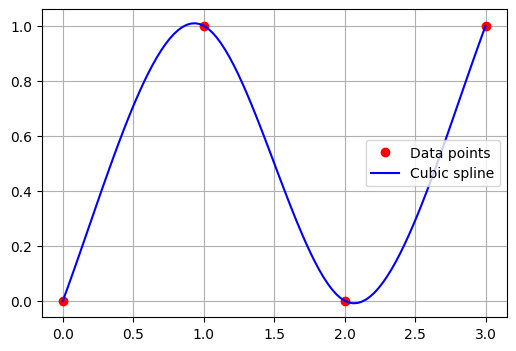

In [26]:
from scipy.interpolate import CubicSpline
import numpy as np

# Dữ liệu điểm
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])

# Giá trị đạo hàm tại hai đầu mút
f_double_prime_a = 0  # Đạo hàm tại x[0]
f_double_prime_a = 0  # Đạo hàm tại x[-1]

# Tạo spline cubic với đạo hàm tại hai đầu mút
cs = CubicSpline(x, y, bc_type=((2, f_prime_a), (2, f_prime_b)))

# Lấy hệ số của các đa thức spline
coefficients = cs.c

# In ra hệ số
print("Hệ số của các hàm bậc ba trên các đoạn giữa các mốc nội suy:")
for i, coef in enumerate(coefficients.T, 1):
    print(f"Đoạn {i}: {coef}")
# Vẽ đồ thị
xx = np.linspace(x[0], x[-1], 100)
yy = cs(xx)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'ro', label='Data points')
plt.plot(xx, yy, 'b', label='Cubic spline')
plt.grid(True)
plt.legend()
plt.show()